<a href="https://colab.research.google.com/github/clarityEnjoyer/early-basic-ML/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

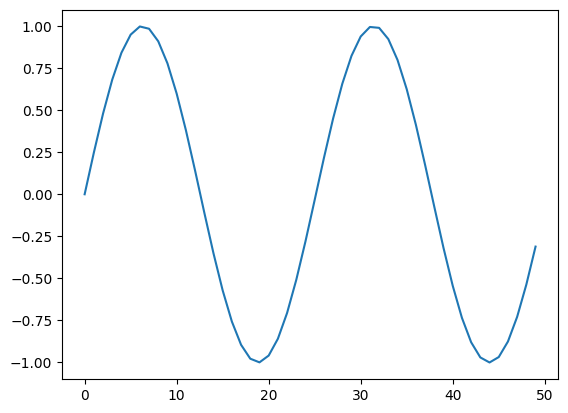

In [333]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

# x = np.linspace(0, 2*np.pi, 100)
x = np.arange(0,50,1)
y = np.sin(x/4)

plt.plot(x, y)
plt.show()

x=x.reshape(-1,1)

here I will build a **polynomial regression** model, which will approximate ***different*** functions (not only straight line fitting).

In [334]:
def scaling_function(X_train_inp):
  X_train=X_train_inp.copy()
  mini = np.min(X_train, axis=0)
  maxi = np.max(X_train, axis=0)
  return (X_train - mini) / (maxi - mini)

model will have multiple features.

In [335]:
X_train =np.c_[x,x**2,x**3,x**0.5,x**4,x**5,np.sin(x)]
print(X_train)
print(X_train.shape)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  8.41470985e-01]
 [ 2.00000000e+00  4.00000000e+00  8.00000000e+00  1.41421356e+00
   1.60000000e+01  3.20000000e+01  9.09297427e-01]
 [ 3.00000000e+00  9.00000000e+00  2.70000000e+01  1.73205081e+00
   8.10000000e+01  2.43000000e+02  1.41120008e-01]
 [ 4.00000000e+00  1.60000000e+01  6.40000000e+01  2.00000000e+00
   2.56000000e+02  1.02400000e+03 -7.56802495e-01]
 [ 5.00000000e+00  2.50000000e+01  1.25000000e+02  2.23606798e+00
   6.25000000e+02  3.12500000e+03 -9.58924275e-01]
 [ 6.00000000e+00  3.60000000e+01  2.16000000e+02  2.44948974e+00
   1.29600000e+03  7.77600000e+03 -2.79415498e-01]
 [ 7.00000000e+00  4.90000000e+01  3.43000000e+02  2.64575131e+00
   2.40100000e+03  1.68070000e+04  6.56986599e-01]
 [ 8.00000000e+00  6.40000000e+01  5.12000000e+02  2.82842712e+0

In [336]:
def J(X,y,w,b):
  return np.sum(np.square(np.dot(X,w)+b-y))/(2*y.shape[0])

In [337]:
wt=np.zeros(len(X_train[0]))
bt=0
print(wt,bt)
J(X_train,y,wt,bt)

[0. 0. 0. 0. 0. 0. 0.] 0


np.float64(0.25127383567253164)

In [338]:
def compute_gradient(X,y,w,b):
  m=len(y)
  dj_db = np.sum(np.dot(X,w)+b-y)/m
  dj_dw = np.zeros(w.shape)
  for i in range(m):
    dj_dw += X[i]*(np.dot(X[i],w)+b-y[i])
  return dj_dw/m,dj_db

In [339]:
def gradient_descent(X_train, y, w_start, b_start, learning_rate, iterations):
  X = scaling_function(X_train)
  w = w_start.copy()
  b = b_start
  cost_history = []
  for i in range (iterations):
    if (i%math.ceil(iterations/10)==0):
      print(f'iteration: {i} | J: {J(X,y,w,b):e}|    w: {w}  | b: {b}')
    if (i%math.ceil(iterations/100)==0):
      cost_history.append(J(X,y,w,b))
    dj_dw,dj_db = compute_gradient(X,y,w,b)
    w -= learning_rate*dj_dw
    b -= learning_rate*dj_db
  return w,b,cost_history


In [343]:
w_found,b_found,hist = gradient_descent(X_train,y,wt,bt,1e-1,1000000)
# print(wt,bt)
print(w_found,b_found)

iteration: 0 | J: 2.512738e-01|    w: [0. 0. 0. 0. 0. 0. 0.]  | b: 0
iteration: 100000 | J: 1.647914e-01|    w: [-10.14980297   8.01935432   5.34989594   3.18899674  -3.16763193
  -5.04028718  -0.15984111]  | b: 0.5047361967181988
iteration: 200000 | J: 1.586328e-01|    w: [-14.92383072  12.34214562   5.79426021   5.45847047  -6.53343392
  -3.77060225  -0.16351706]  | b: 0.29399127740862374
iteration: 300000 | J: 1.543745e-01|    w: [-17.83119102  16.10996826   5.14797002   6.63559289 -10.10729887
  -1.49180705  -0.16381995]  | b: 0.20510877638789823
iteration: 400000 | J: 1.506376e-01|    w: [-20.11707628  19.5768875    4.25070755   7.46914339 -13.63392369
   0.99092698  -0.16317981]  | b: 0.15295065856285653
iteration: 500000 | J: 1.472704e-01|    w: [-22.14620923  22.82364626   3.34230173   8.17734814 -17.04485502
   3.44894162  -0.16229864]  | b: 0.11278907377409851
iteration: 600000 | J: 1.442277e-01|    w: [-24.02813237  25.88042994   2.4890444    8.8247231  -20.32546811
   5.820

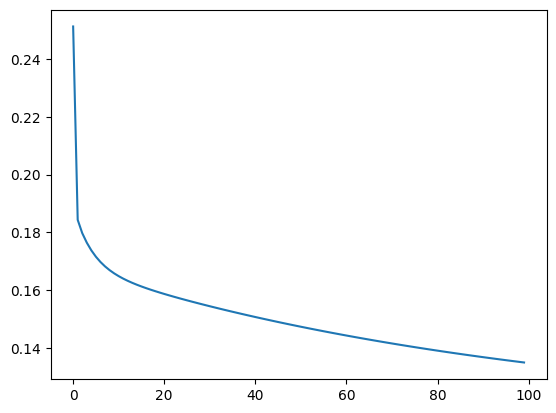

In [344]:
plt.plot(hist)
plt.show()

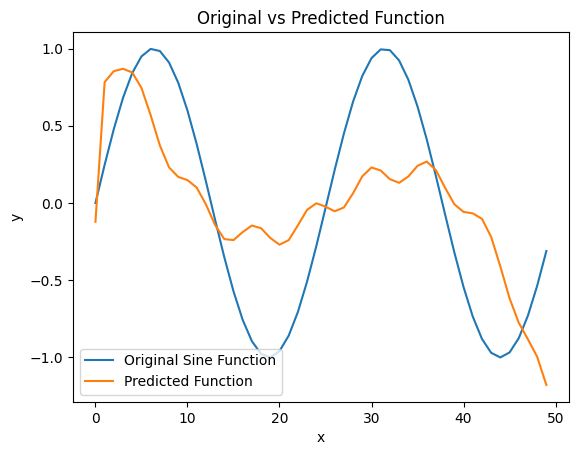

In [345]:
# Scale the input data X before making predictions
X_scaled = scaling_function(X_train)

prediction = np.dot(X_scaled,w_found)+b_found
plt.plot(x,y, label='Original Sine Function')
plt.plot(x,prediction, label='Predicted Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original vs Predicted Function')
plt.legend()
plt.show()

you can freely modify and engineer features and other variables:)